## Setting

In [1]:
from qiskit import *
import icepp
import numpy as np

# Needed for functions
from copy import deepcopy

# Import Qiskit classes
import qiskit
import qiskit.quantum_info as qi
from pytket.extensions.qiskit import IBMQBackend, AerStateBackend, AerBackend

# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

In [ ]:
backend_name = 'ibm_kawasaki'

In [3]:
IBMQ.load_account()

# Fill your provider information
# Example: provider = IBMQ.get_provider(hub=ibm-q'',group='open',project='main')
provider = IBMQ.get_provider(hub='',group='',project='')

backend = provider.get_backend(backend_name)
sim_b = AerBackend()
dev_b = IBMQBackend(backend_name=backend_name, hub='',group='',project='')

In [6]:
def decompose_to_toffoli(qc):

    qc = icepp.decompose().decompose_mcu(qc)
    
    return qc

def experiment(qc, backend, shots):
    
    results = icepp.qc_experiment(qc_list=[qc]*30, backend=backend, shots=shots).run()
    
    return results

## Circuits

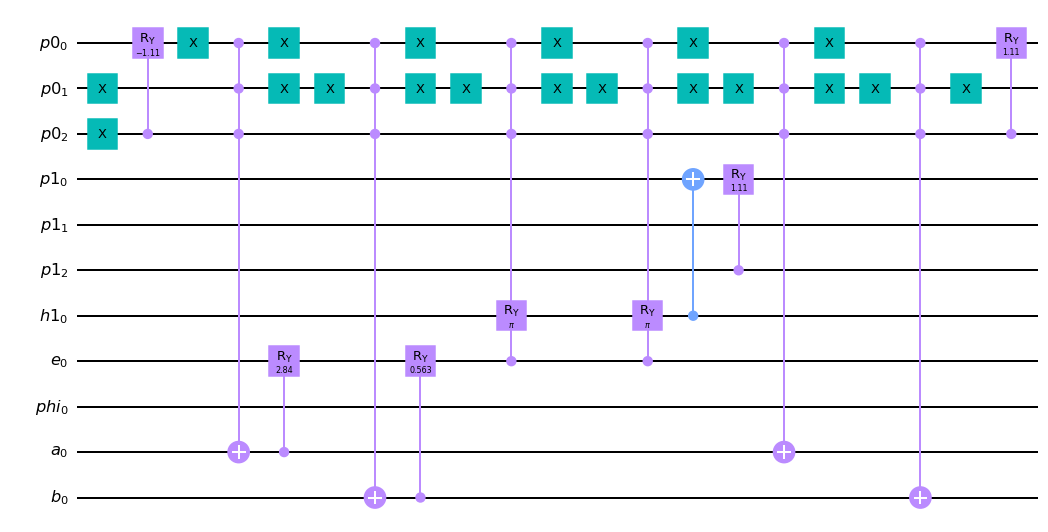

In [7]:
from sample.onestepSim_LBNL import runQuantum as step_1
circuit_LBNL1 = step_1(gLR=1,dophisplit=1)
circuit_LBNL1.remove_final_measurements()
circuit_LBNL1.draw('mpl')

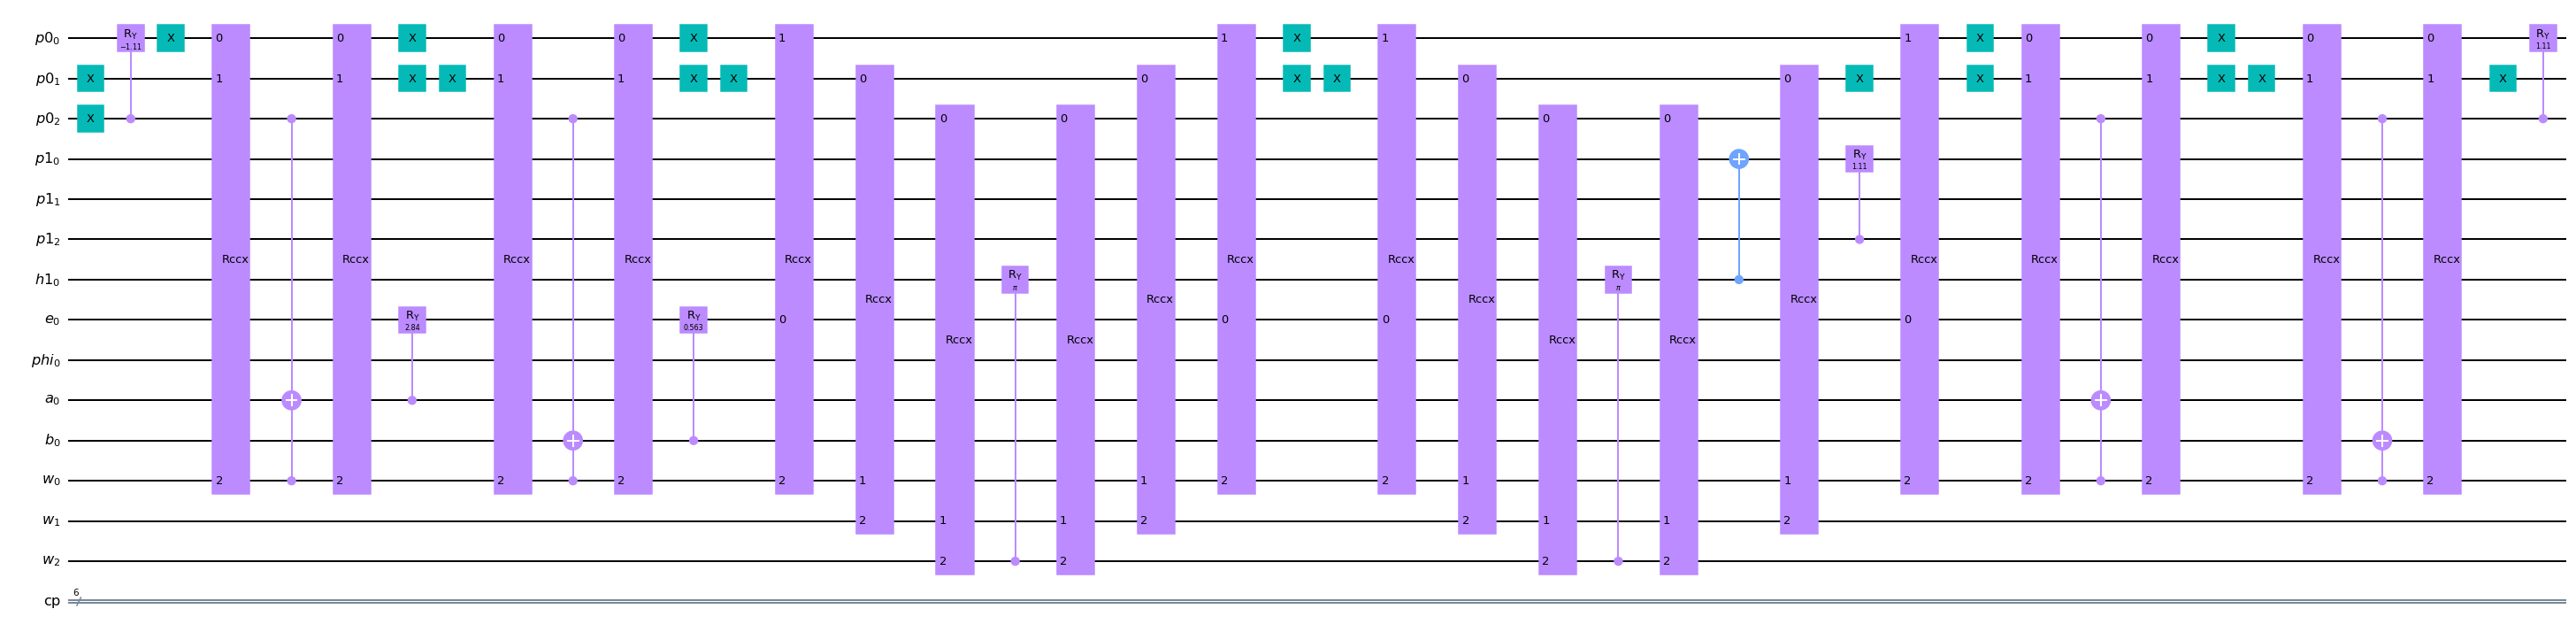

In [8]:
cp = ClassicalRegister(6,'cp')

original_qc = decompose_to_toffoli(circuit_LBNL1)
original_qc.add_register(cp)
original_qc.draw('mpl',fold=100)

In [9]:
for gate in circuit_LBNL1:
    if gate[0].name in ['cry','ry']:
        print(gate[0].params[0])

-1.1071487177940904
2.836403863435761
0.5626157753750611
1.1071487177940904
1.1071487177940904


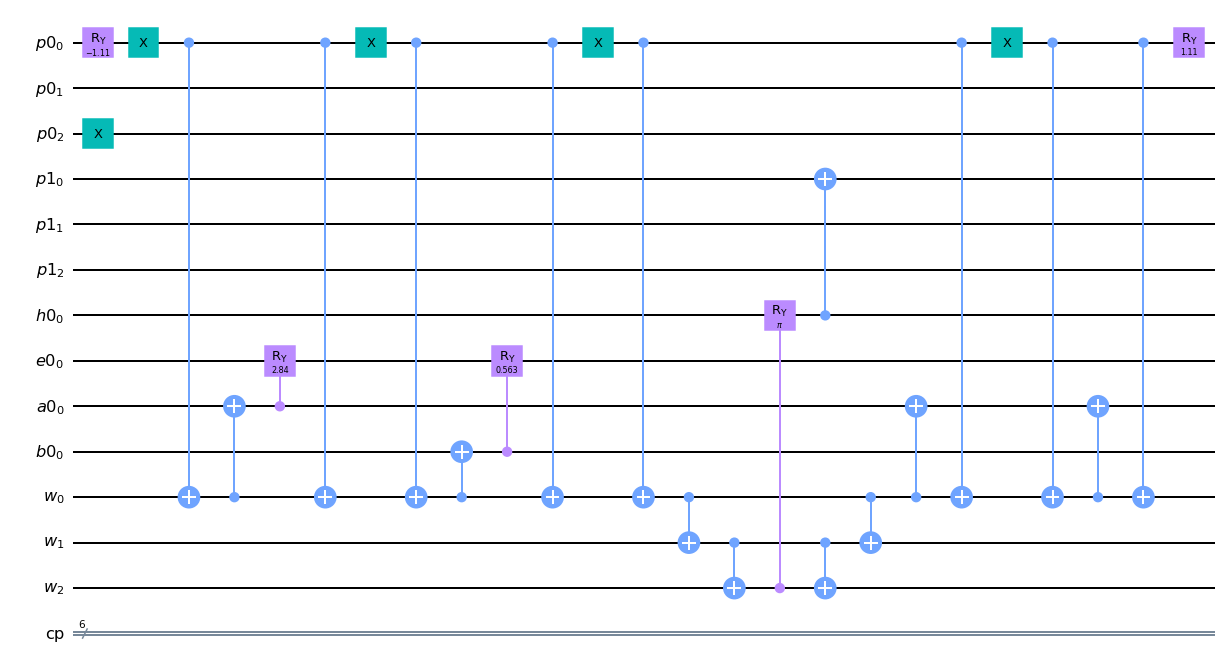

In [10]:
p0 = QuantumRegister(3,'p0')
p1 = QuantumRegister(3,'p1')
h0 = QuantumRegister(1,'h0')
e0 = QuantumRegister(1,'e0')
a0 = QuantumRegister(1,'a0')
b0 = QuantumRegister(1,'b0')
w = QuantumRegister(3,'w')
cp = ClassicalRegister(6,'cp')

qc_const = QuantumCircuit(p0,p1,h0,e0,a0,b0,w,cp)
qc_const.ry(-1.1071487177940904,0)
qc_const.x(0)
qc_const.x(2)
qc_const.cx(0,10)
qc_const.cx(10,8)
qc_const.cry(2.836403863435761,8,7)
qc_const.cx(0,10)
qc_const.x(0)
qc_const.cx(0,10)
qc_const.cx(10,9)
qc_const.cry(0.5626157753750611,9,7)
qc_const.cx(0,10)

qc_const.x(0)
qc_const.cx(0,10)
qc_const.cx(10,11)
qc_const.cx(11,12)
qc_const.cry(np.pi,12,6)
qc_const.cx(6,3)
qc_const.cx(11,12)
qc_const.cx(10,11)
qc_const.cx(10,8)
qc_const.cx(0,10)
qc_const.x(0)
qc_const.cx(0,10)
qc_const.cx(10,8)
qc_const.cx(0,10)
qc_const.ry(1.1071487177940904,0)

qc_const.draw('mpl',fold=100)

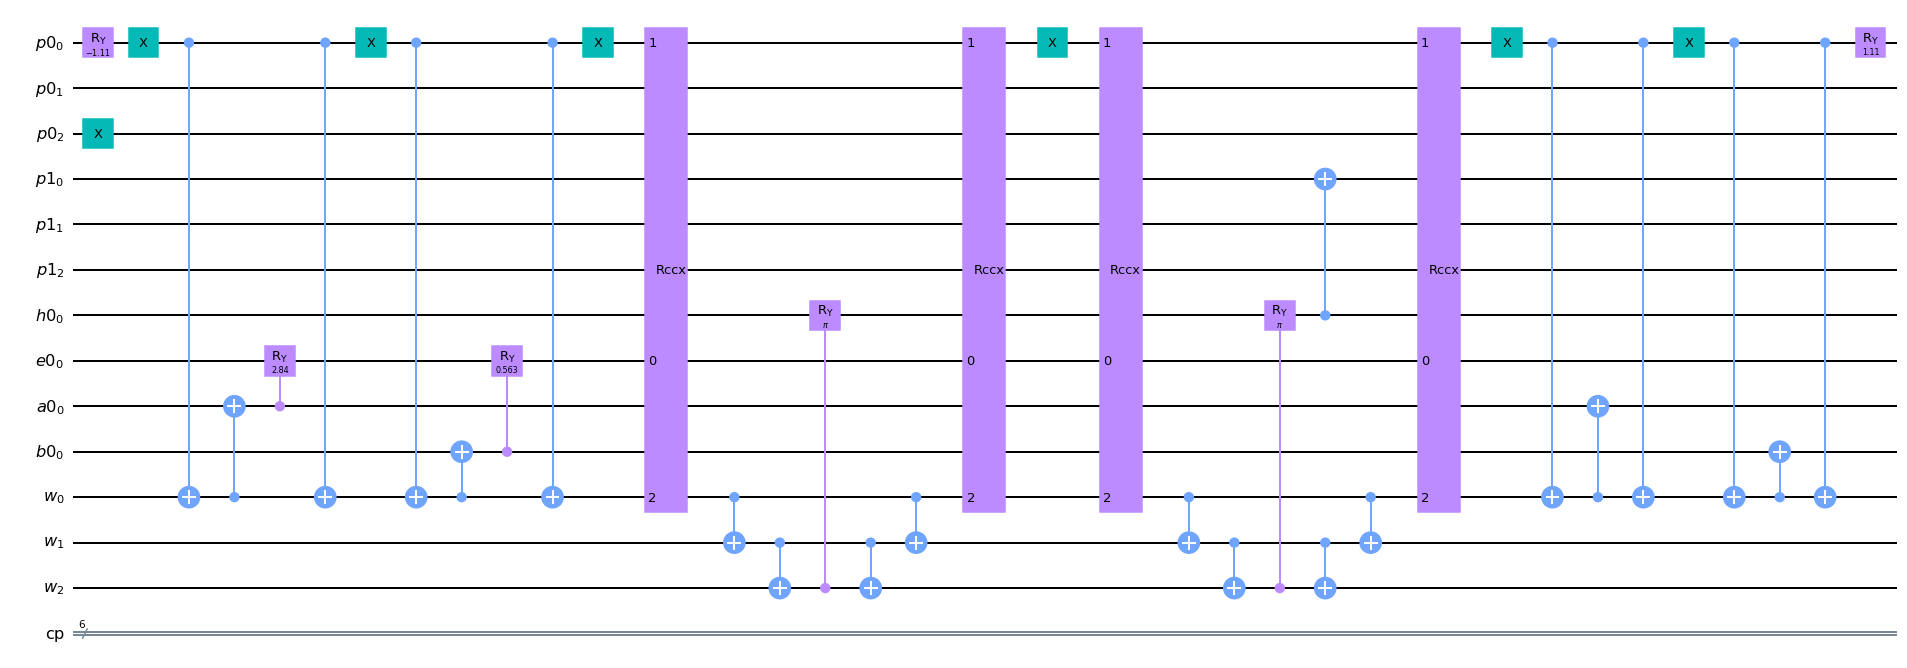

In [11]:
qc_dyna = QuantumCircuit(p0,p1,h0,e0,a0,b0,w,cp)
qc_dyna.ry(-1.1071487177940904,0)
qc_dyna.x(0)
qc_dyna.x(2)
qc_dyna.cx(0,10)
qc_dyna.cx(10,8)
qc_dyna.cry(2.836403863435761,8,7)
qc_dyna.cx(0,10)
qc_dyna.x(0)
qc_dyna.cx(0,10)
qc_dyna.cx(10,9)
qc_dyna.cry(0.5626157753750611,9,7)
qc_dyna.cx(0,10)

qc_dyna.x(0)
qc_dyna.rccx(7,0,10)
qc_dyna.cx(10,11)
qc_dyna.cx(11,12)
qc_dyna.cry(np.pi,12,6)
qc_dyna.cx(11,12)
qc_dyna.cx(10,11)
qc_dyna.rccx(7,0,10)
qc_dyna.x(0)

qc_dyna.rccx(7,0,10)
qc_dyna.cx(10,11)
qc_dyna.cx(11,12)
qc_dyna.cry(np.pi,12,6)
qc_dyna.cx(6,3)
qc_dyna.cx(11,12)
qc_dyna.cx(10,11)
qc_dyna.rccx(7,0,10)
qc_dyna.x(0)

qc_dyna.cx(0,10)
qc_dyna.cx(10,8)
qc_dyna.cx(0,10)
qc_dyna.x(0)
qc_dyna.cx(0,10)
qc_dyna.cx(10,9)
qc_dyna.cx(0,10)
qc_dyna.ry(1.1071487177940904,0)

#for x in range(6):
    #qc.measure(x,x)

qc_dyna.draw('mpl',fold=100)

## Quantum State Tomography (Simulator)

In [12]:
def density_matrix(qc, qubits):
    
    statevector = icepp.simulator(qc).statevector_simulator(output='statevector')
    rho = qi.partial_trace(statevector, qubits)
    
    return rho

In [13]:
rho_original_sim = density_matrix(circuit_LBNL1, [6,7,8,9,10])
rho_constant_sim = density_matrix(qc_const, [6,7,8,9,10,11,12])
rho_dynamic_sim  = density_matrix(qc_dyna, [6,7,8,9,10,11,12])

In [14]:
rho_original_sim.probabilities_dict()

{'000100': 0.14101480996166746,
 '000101': 0.13079599534594066,
 '001100': 0.627151054356191,
 '001101': 0.10103814033620505}

In [15]:
rho_constant_sim.probabilities_dict()

{'000100': 0.07639320225002104,
 '000101': 0.20000000000000007,
 '001100': 0.5236067977499789,
 '001101': 0.19999999999999996}

In [16]:
round(qi.state_fidelity(rho_original_sim, rho_constant_sim),4), round(qi.state_fidelity(rho_original_sim, rho_dynamic_sim),4)

(0.9618, 1.0)

## Quantum State Tomography (Experiment)

In [51]:
from qiskit.transpiler.passes import RemoveBarriers
import copy

# Input qc must not have measurments
def state_tomography(qc, shots):
    
    qc = copy.deepcopy(qc)
    
    for x in range(6):
        qc.measure(x,x)
    transpiled_qc = icepp.transpiler(qc, backend, dev_b, level=3).transpile()
    
    measure_qubits = []
    for gate in transpiled_qc:
        if gate[0].name == 'measure':
            measure_qubits.append(gate[1][0]._index)
            
    transpiled_qc.remove_final_measurements()
    qst_qc = state_tomography_circuits(transpiled_qc, measure_qubits)

    nobarrier_qst_qcs = []
    for qc in qst_qc:
        nobarrier_qst_qcs.append(RemoveBarriers()(qc))        
    qst_qc = transpile(nobarrier_qst_qcs, backend, optimization_level=0, seed_transpiler=1)

    result = icepp.qc_experiment(qst_qc, backend, shots=shots).run()
    results = result.combine_results()
    
    #tomo = StateTomographyFitter(results, qst_qc)
    #rho_fit = tomo.fit(method='lstsq')
    
    #return rho_fit
    return qst_qc, results

In [20]:
qst_qc, rho_original = state_tomography(original_qc, 1)

Job id : b15b411e40da4a53a03ba61c7c7edb6a-1658886671568811
Job Status: job has successfully run


In [21]:
tomo = StateTomographyFitter(rho_original, qst_qc)

In [ ]:
rho_fit = tomo.fit(method='lstsq')

In [ ]:
#Fidelity = qi.state_fidelity(rho_fit1, rho_fit2)